# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_distances
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Content = Business's Description

In [2]:
df = pd.read_csv("data/sponsors.csv")
df

,name,category,sub-category,about,metadata
0,Asus Indonesia,Sponsor,Technology Hardware,ASUS is passionate about technology and driven...,Sponsor Technology Hardware ASUS is passionate...
1,Hydro Coco,Sponsor,Food & Beverage,Tentang Hydro Coco\r\nHydro Coco terbuat dari ...,Sponsor Food & Beverage Tentang Hydro Coco\r\n...
2,Nutrijell,Sponsor,Food & Beverage,Nutrijell is a leading agar-agar brand in Indo...,Sponsor Food & Beverage Nutrijell is a leading...
3,Zalora Indonesia,Sponsor,E-Commerce,"Zalora Indonesia, the largest online fashion r...","Sponsor E-Commerce Zalora Indonesia, the large..."
4,Marina,Sponsor,Personal & Beauty,Marina Natural is a leading Indonesian cosmeti...,Sponsor Personal & Beauty Marina Natural is a ...
...,...,...,...,...,...
857,photobooth wedding murah jabodetabek,Equipment Rental,Photobooth,photobooth wedding murah jabodetabek,Equipment Rental Photobooth photobooth wedding...
858,photo booth ulang tahun murah,Equipment Rental,Photobooth,photo booth ulang tahun murah,Equipment Rental Photobooth photo booth ulang ...
859,MobileTrans - Wa Transfer dan Line Transfer Or...,Equipment Rental,Photobooth,MobileTrans - Wa Transfer dan Line Transfer Or...,Equipment Rental Photobooth MobileTrans - Wa T...
860,SEWA WIFI JEPANG | JAPAN WIFI | SEWA JAPAN WIFI,Equipment Rental,Photobooth,SEWA WIFI JEPANG | JAPAN WIFI | SEWA JAPAN WIFI,Equipment Rental Photobooth SEWA WIFI JEPANG |...


# Encode All About to a Bank

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Arsya
[nltk_data]     Amalia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
bow = CountVectorizer(stop_words="english", min_df=1, tokenizer=word_tokenize)
bank = bow.fit_transform(df.metadata)

## Step 1: Encode What User Click

In [5]:
idx = 66

In [6]:
content = df.loc[idx, "metadata"]
content

'Sponsor Personal & Beauty Makeover is an Indonesian cosmetics brand offering a comprehensive range of makeup and skincare products. With a focus on providing high-quality and on-trend beauty items, Makeover has gained popularity among consumers seeking both traditional and modern beauty solutions.'

In [7]:
code = bow.transform([content])
code.toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Step 2: Document Search

In [8]:
dist = cosine_distances(code, bank)
dist

array([[0.75851277, 0.88859377, 0.70621517, 0.78445245, 0.68715064,
        0.69543382, 0.74952253, 0.79675608, 0.70670577, 0.73547997,
        0.70997345, 0.78054973, 0.7451983 , 0.71042975, 0.73489413,
        0.75828058, 0.76216464, 0.78841818, 0.76566679, 0.72397378,
        0.75241797, 0.74215602, 0.68813284, 0.76901369, 0.77016514,
        0.70610923, 0.7498918 , 0.57269639, 0.72998212, 0.8059039 ,
        0.83697217, 0.83295903, 0.77571935, 0.75483361, 0.77980999,
        0.67600313, 0.81229654, 0.75060813, 0.7628821 , 0.7475866 ,
        0.6448576 , 0.67463742, 0.66238815, 0.79566466, 0.73660671,
        0.73917973, 0.79826335, 0.78510261, 0.79903003, 0.73752467,
        0.81442313, 0.75914517, 0.73057466, 0.7606225 , 0.77169417,
        0.71067834, 0.42616442, 0.79380348, 0.7634779 , 0.76053963,
        0.42758022, 0.73959275, 0.63968168, 0.7432237 , 0.79193741,
        0.74316525, 0.        , 0.83354992, 0.80097892, 0.76671526,
        0.76194412, 0.65060117, 0.76671526, 0.61

In [9]:
rec_idx = dist.argsort()[0, 1:11]
rec_idx

array([56, 60, 80, 83, 27, 73, 62, 40, 71, 42], dtype=int64)

## Step 3: Recommend

In [10]:
df.loc[rec_idx]

,name,category,sub-category,about,metadata
56,Mustika Ratu,Sponsor,Personal & Beauty,Mustika Ratu is a well-known Indonesian cosmet...,Sponsor Personal & Beauty Mustika Ratu is a we...
60,Holika-holika,Sponsor,Personal & Beauty,Holika-holika is a South Korean cosmetics bran...,Sponsor Personal & Beauty Holika-holika is a S...
80,Wardah,Sponsor,Personal & Beauty,Wardah is an Indonesian cosmetics and skincare...,Sponsor Personal & Beauty Wardah is an Indones...
83,The Body Shop,Sponsor,Personal & Beauty,The Body Shop is a global beauty and cosmetics...,Sponsor Personal & Beauty The Body Shop is a g...
27,Paragon,Sponsor,Personal & Beauty,Paragon Technology and Innovation is an Indone...,Sponsor Personal & Beauty Paragon Technology a...
73,Nivea,Sponsor,Personal & Beauty,Nivea is a global brand that primarily focuses...,Sponsor Personal & Beauty Nivea is a global br...
62,Damn I Love Indonesia,Sponsor,Textiles & Apparel,Damn I Love Indonesia (DILo) is a lifestyle br...,Sponsor Textiles & Apparel Damn I Love Indones...
40,Head & Shoulders,Sponsor,Personal & Beauty,Head & Shoulders is a well-known brand of anti...,Sponsor Personal & Beauty Head & Shoulders is ...
71,Bukalapak,Sponsor,E-Commerce,Bukalapak is an Indonesian online marketplace ...,Sponsor E-Commerce Bukalapak is an Indonesian ...
42,Alfamart,Sponsor,Distribution & Retail,Alfamart is a leading Indonesian convenience s...,Sponsor Distribution & Retail Alfamart is a le...


# ML Engineering: Sum Them All Up

In [11]:
class RecommenderSystem:
    def __init__(self, data, content_col):
        self.df = pd.read_csv(data)
        self.content_col = content_col
        self.encoder = None
        self.model = None

    def preprocess_data(self):
        X_train, X_val, y_train, y_val = train_test_split(
            self.df['metadata'], self.df['category'], test_size=0.2, random_state=42
        )

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_val_encoded = label_encoder.transform(y_val)

        return X_train, X_val, y_train_encoded, y_val_encoded

    def train_model(self, X_train, y_train, X_val, y_val, epochs=10):
        self.encoder = CountVectorizer(stop_words="english", tokenizer=word_tokenize)
        X_train_encoded = self.encoder.fit_transform(X_train).toarray()
        X_val_encoded = self.encoder.transform(X_val).toarray()

        model = Sequential([
            Dense(128, activation='relu', input_shape=(X_train_encoded.shape[1],)),
            Dense(64, activation='relu'),
            Dense(len(np.unique(y_train)), activation='softmax')
        ])

        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(X_train_encoded, y_train, epochs=epochs, validation_data=(X_val_encoded, y_val), verbose=1)

        # Extract final training and validation accuracy
        final_train_accuracy = history.history['accuracy'][-1]
        final_val_accuracy = history.history['val_accuracy'][-1]

        print(f"Final Training Accuracy: {final_train_accuracy * 100:.2f}%")
        print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")

        # Save the trained model
        model.save("content-based-filtering.h5")

        return model, history

    def plot_accuracy(self, history):
        # Plot training and validation accuracy
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def fit(self):
        self.encoder = CountVectorizer(stop_words="english", tokenizer=word_tokenize)
        self.bank = self.encoder.fit_transform(self.df[self.content_col])

    def recommend(self, idx, topk=10):
        content = df.loc[idx, self.content_col]
        code = self.encoder.transform([content])
        dist = cosine_distances(code, self.bank)
        rec_idx = dist.argsort()[0, 1:(topk+1)]
        return self.df.loc[rec_idx]

    def run(self):
        X_train, X_val, y_train, y_val = self.preprocess_data()
        self.model, history = self.train_model(X_train, y_train, X_val, y_val, epochs=10)
        self.plot_accuracy(history)

In [12]:
recsys = RecommenderSystem("data/sponsors.csv", content_col="metadata")

Epoch 1/10
22/22 [==============================] - 1s 46ms/step - loss: 0.3408 - accuracy: 0.9652 - val_loss: 0.0597 - val_accuracy: 1.0000
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 0.0170 - accuracy: 0.9985 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/10
22/22 [==============================] - 0s 4ms/step - loss: 9.9354e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 7.4917e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/10
22/22 [==============================] - 0s 6ms/step - loss: 5.8112e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 8

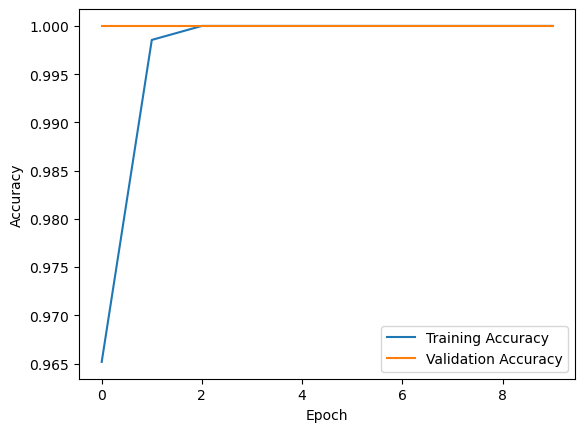

In [13]:
recsys.run()

In [14]:
recsys.fit()
recsys.recommend(66)

,name,category,sub-category,about,metadata
56,Mustika Ratu,Sponsor,Personal & Beauty,Mustika Ratu is a well-known Indonesian cosmet...,Sponsor Personal & Beauty Mustika Ratu is a we...
60,Holika-holika,Sponsor,Personal & Beauty,Holika-holika is a South Korean cosmetics bran...,Sponsor Personal & Beauty Holika-holika is a S...
80,Wardah,Sponsor,Personal & Beauty,Wardah is an Indonesian cosmetics and skincare...,Sponsor Personal & Beauty Wardah is an Indones...
83,The Body Shop,Sponsor,Personal & Beauty,The Body Shop is a global beauty and cosmetics...,Sponsor Personal & Beauty The Body Shop is a g...
27,Paragon,Sponsor,Personal & Beauty,Paragon Technology and Innovation is an Indone...,Sponsor Personal & Beauty Paragon Technology a...
73,Nivea,Sponsor,Personal & Beauty,Nivea is a global brand that primarily focuses...,Sponsor Personal & Beauty Nivea is a global br...
62,Damn I Love Indonesia,Sponsor,Textiles & Apparel,Damn I Love Indonesia (DILo) is a lifestyle br...,Sponsor Textiles & Apparel Damn I Love Indones...
40,Head & Shoulders,Sponsor,Personal & Beauty,Head & Shoulders is a well-known brand of anti...,Sponsor Personal & Beauty Head & Shoulders is ...
71,Bukalapak,Sponsor,E-Commerce,Bukalapak is an Indonesian online marketplace ...,Sponsor E-Commerce Bukalapak is an Indonesian ...
42,Alfamart,Sponsor,Distribution & Retail,Alfamart is a leading Indonesian convenience s...,Sponsor Distribution & Retail Alfamart is a le...


# To load the model later

In [15]:
from tensorflow.keras.models import load_model

loaded_model = load_model("content-based-filtering.h5")